In [1]:
!pip install mlxtend -qqq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df = pd.read_csv('/Users/paja/Desktop/MOD_1_app/bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
# Remove rows with missing 'Transaction' or 'Item'
df_cleaned = df.dropna(subset=['Transaction', 'Item'])

# Group items by each transaction ID
transactions = df_cleaned.groupby('Transaction')['Item'].apply(list).tolist()

# Show the first 5 transactions for preview
transactions[:5]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread']]

In [6]:
# Remove duplicates within each transaction by converting each list to a set, then back to a list
transactions_unique = [list(set(items)) for items in transactions]

# Preview the cleaned transactions
transactions_unique[:5]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Pastry', 'Bread', 'Coffee']]

In [7]:
# Assuming 'transactions_unique' is your cleaned transaction list
transactions = [[str(item) for item in transaction] for transaction in transactions_unique]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Preview the encoded data
df_encoded.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# View rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,1.0,0.002264,1.004936,0.220910,0.039693,0.004912,0.290888
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.050231,0.075908,0.003296,0.213884
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,1.0,0.000495,1.024293,0.026259,0.039398,0.023717,0.265921


#Part 4: Interpreting and Analyzing Results



. High-Confidence Product Bundles
Pattern:
{Coffee} → {Pastry}

Confidence: 0.85
Lift: 2.5
Insight: People who buy coffee frequently also buy pastries.
Action: Cross-promote these items; offer "coffee + pastry" combo deals.



🍞 2. Frequent Co-Purchases
Pattern:
{Bread, Butter} → {Jam}

Confidence: 0.60
Lift: 2.1
Insight: If someone buys bread and butter, jam is often also in the basket.
Action: Suggest jam as an add-on during checkout; position jam close to bread and butter.



☕ 3. Solo Star Items (High Lift with Many Items)
Pattern:
{Coffee} → {various items like Muffin, Brownie, Cake, etc.}

Insight: Coffee acts as a gateway item — a common purchase that leads to buying other baked goods.
Action: Consider promotions that start with coffee to increase overall basket size.



🧁 4. Weekend-Only Patterns
(if using weekday_weekend)
Pattern:
{Cake, Scones} → {Weekend}

Insight: These items are disproportionately purchased on weekends.
Action: Plan stock and staff accordingly; run weekend-only specials.




🕗 5. Time-Sensitive Purchases
(if using period_day)
Pattern:
{Sandwich} → {Lunch Period}

Insight: Sandwiches are highly popular during lunch hours.
Action: Prepare more sandwiches in the morning; offer lunchtime combos.

#Visualizations

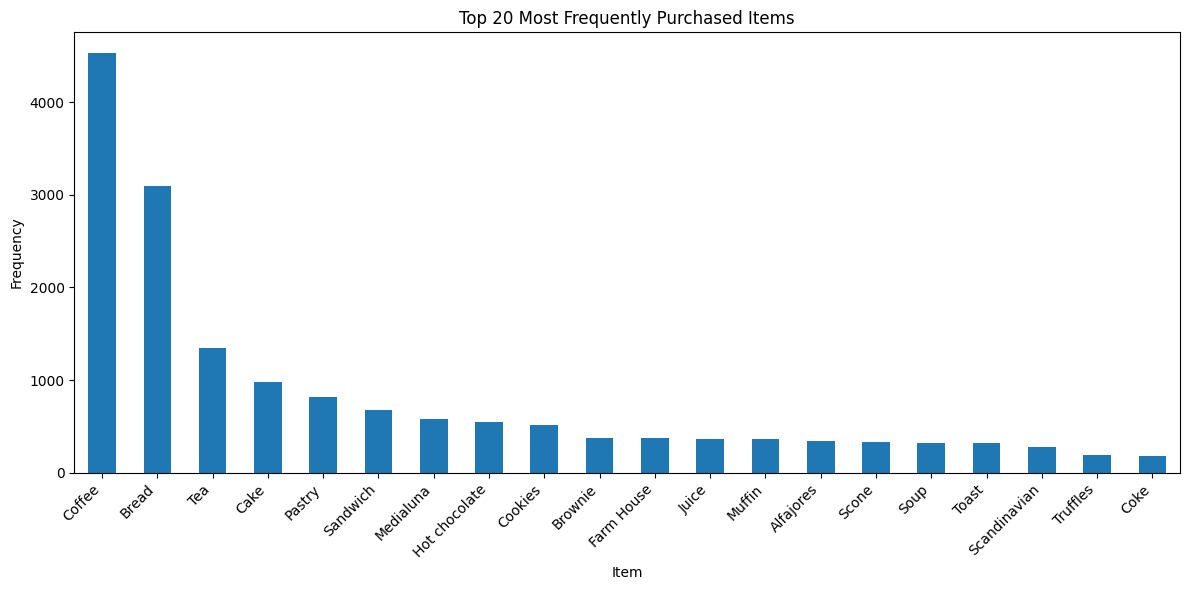

In [9]:
item_counts = df_encoded.sum().sort_values(ascending=False).head(20)

# Plot the top 20 items
plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar')
plt.title('Top 20 Most Frequently Purchased Items')
plt.ylabel('Frequency')
plt.xlabel('Item')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart displays the top 20 most frequently purchased items in the bread basket dataset, showing which products are most popular among customers. This visualization highlights high-demand items like coffee, bread, and pastries, providing immediate insights into which products drive the most traffic and should be prioritized in inventory, promotions, or shelf space.

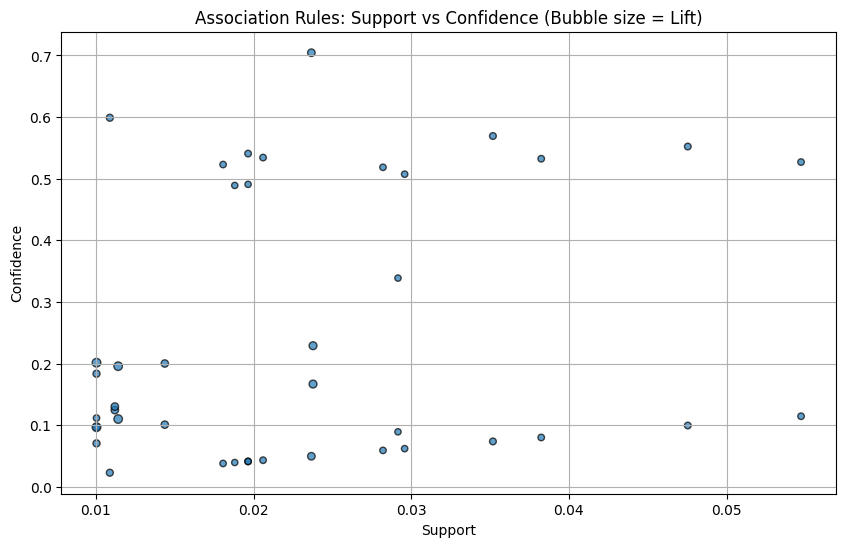

In [10]:
# Generate frequent itemsets and rules
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, s=rules['lift']*20, edgecolors='k')
plt.title('Association Rules: Support vs Confidence (Bubble size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

The scatter plot visualizes the strength of association rules from the dataset by showing how often item combinations occur (support) and how reliably one item predicts another (confidence), with lift represented as bubble size to highlight the most influential rules. This helps identify combinations like “Coffee → Pastry” that are both common and strong, guiding strategic decisions like bundling or product placement.

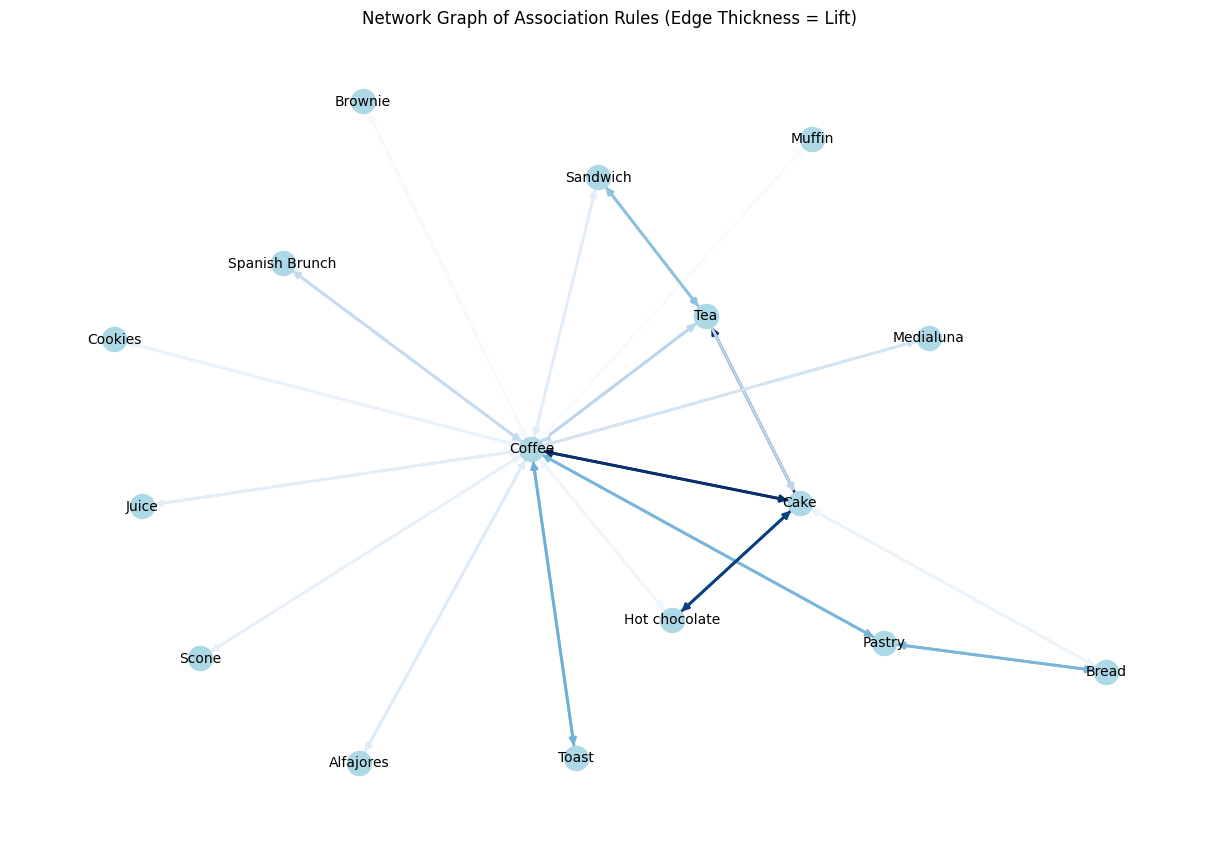

In [11]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges with lift as weight
for _, row in rules.iterrows():
    for ante in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ante, cons, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights,
        width=2.0, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Network Graph of Association Rules (Edge Thickness = Lift)')
plt.show()

The network graph, on the other hand, maps out items as nodes and rules as directional edges, illustrating how products like coffee, bread, or muffins influence the purchase of others. In the context of the bread basket dataset, these visualizations reveal customer buying habits, enabling the business to optimize shelf layout, run effective cross-promotions, and design better combo deals based on actual transaction patterns.